In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DWM/supermarket_sales - Sheet1 (1).csv')

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df = data.copy()

# **ANALYSIS OF DATA**

***Which product line has more sale?***

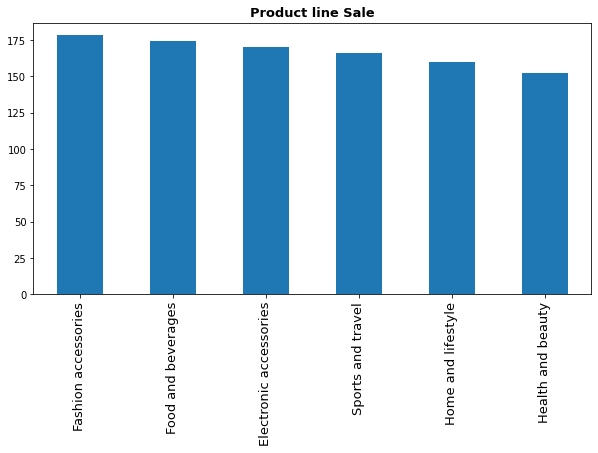

In [ ]:
plt.figure(figsize=(10,5))
df['Product line'].value_counts().plot.bar().set_title("Product line Sale",fontsize=13,fontweight='bold')
plt.xticks(fontsize=13)
plt.show()

***Which is the most pouplar payment method used by customers?***

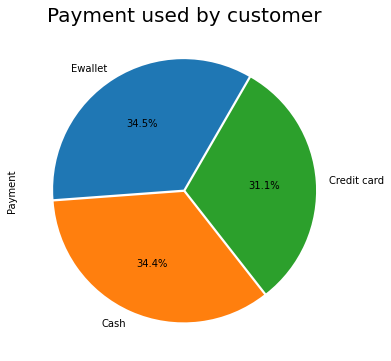

In [ ]:
plt.figure(figsize=(6,6))
df['Payment'].value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.1f%%',startangle=60)
plt.title('Payment used by customer',fontsize=20)
plt.show()

***Total bill in each product line***

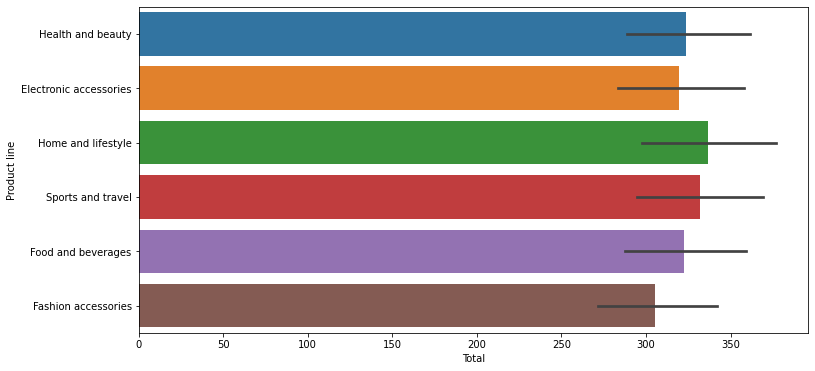

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total'],y=df['Product line'])
plt.show()

***Product sales on the basis of gender***

In [ ]:
df.groupby('Product line')['Gender'].value_counts()

Product line            Gender
Electronic accessories  Male      86
                        Female    84
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Male      88
                        Female    64
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Female    88
                        Male      78
Name: Gender, dtype: int64

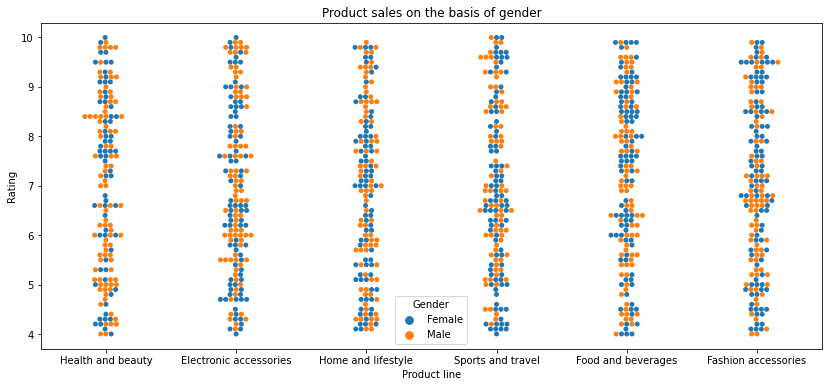

In [ ]:
plt.figure(figsize=(14,6))
sns.swarmplot(x= "Product line", y = "Rating", hue = "Gender", data = df).set_title("Product sales on the basis of gender")
plt.show()

***Which City is the most profitable?***

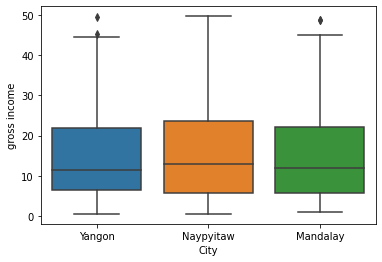

In [ ]:
sns.boxplot(x=df['City'], y=df['gross income'])
plt.show()

***Which product line generates most income?***

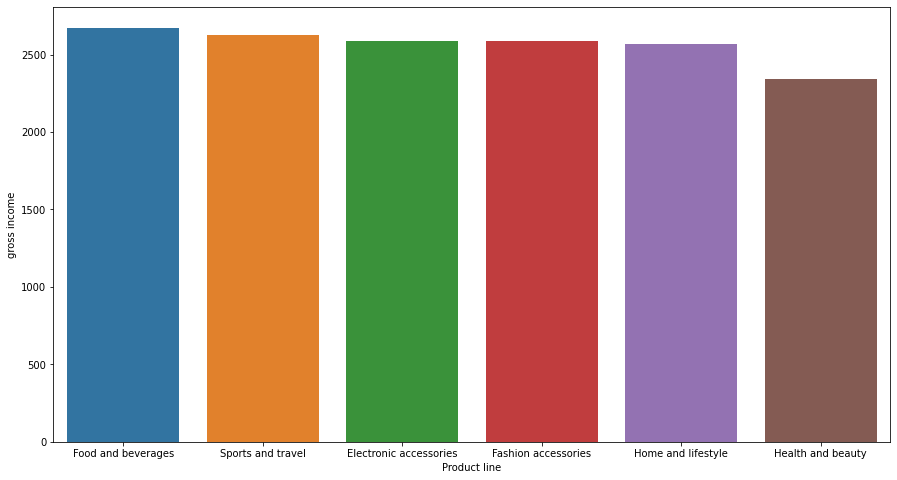

In [ ]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum()
cat_sort=cat.sort_values(by='gross income', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x='Product line', y='gross income', data=cat_sort)
plt.show()

In [ ]:
data[[i for i in data.columns if data[i].dtypes == 'object']]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [ ]:
data[[i for i in data.columns if data[i].dtypes != 'object']]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [ ]:
data['DateTime'] = data['Date']+" "+ data['Time']
data['DateTime'] = pd.to_datetime(data['DateTime'])

# **DATA ANALYSIS AND DATA CLEANING**

In [ ]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

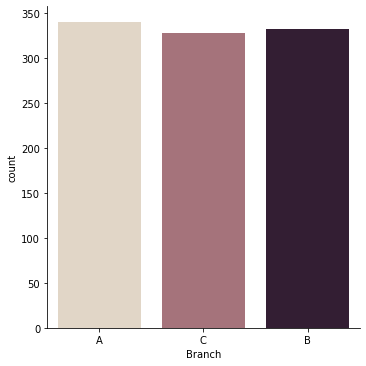

In [ ]:
sns.catplot(x="Branch", kind="count", palette="ch:.25", data=data)

In [ ]:
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
data = data.drop(['City'],axis=1)
data = data.drop(['Date','Time'],axis=1)

In [ ]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

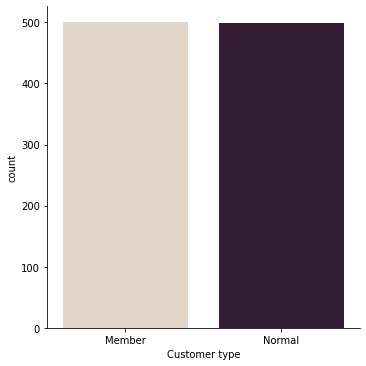

In [ ]:
sns.catplot(x="Customer type", kind="count", palette="ch:.25", data=data)

In [ ]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

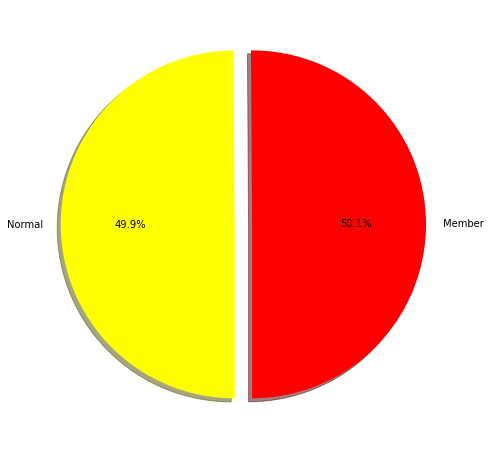

In [ ]:
size = data['Customer type'].value_counts(sort=True)
colors = ['Red','Yellow']
labels = ['Member','Normal']
explode = (0,0.1)
plt.figure(figsize=(10 , 8))
plt.pie(size,colors=colors,autopct='%1.1f%%',shadow=True,startangle = 270 ,explode= explode, labels=labels)

plt.show()

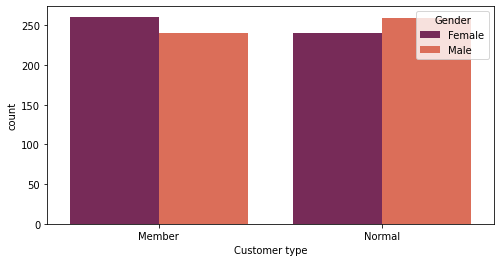

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Customer type', data= data, palette= "rocket",hue = "Gender")

In [ ]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

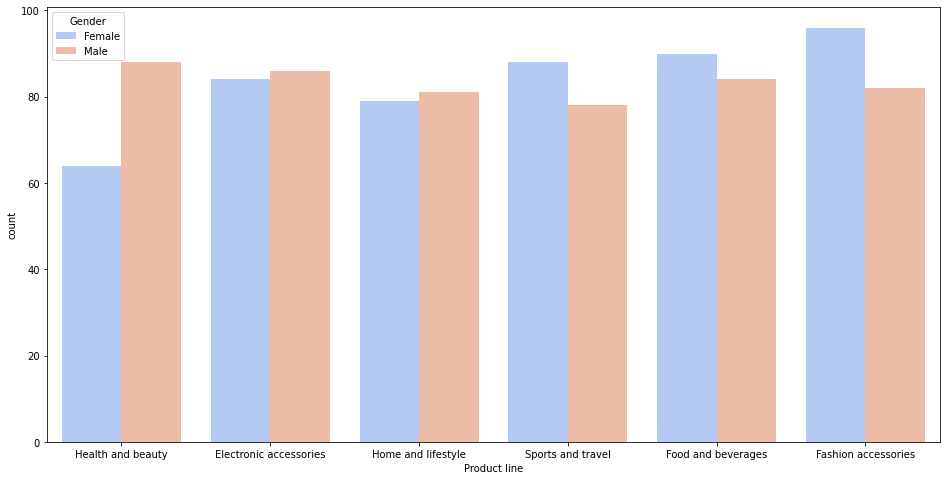

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='Product line',data=data,palette='coolwarm',hue='Gender')

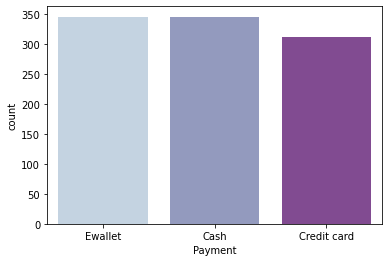

In [ ]:
sns.countplot(x=data['Payment'],data=data,palette='BuPu')

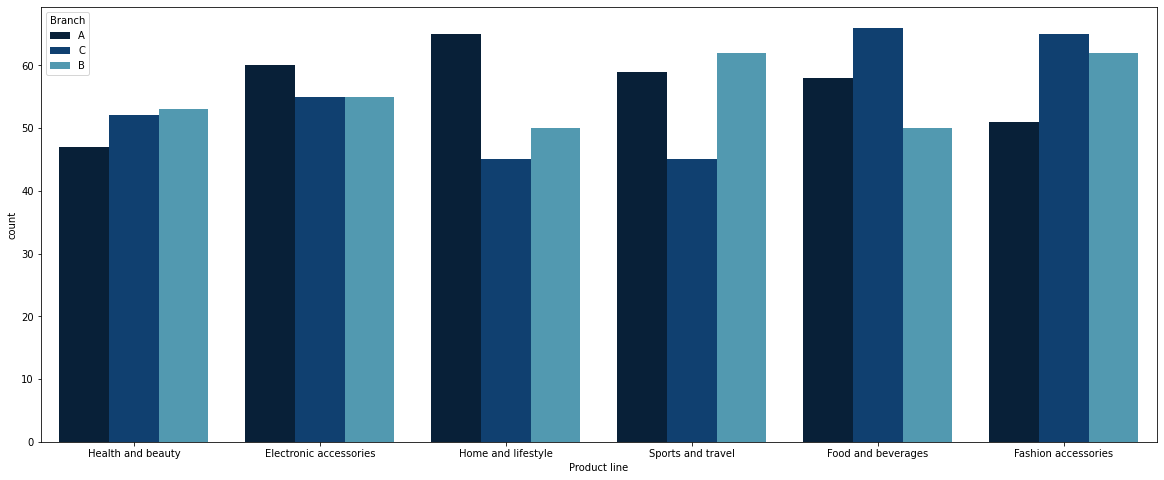

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='Product line',data=data,palette='ocean',hue='Branch')

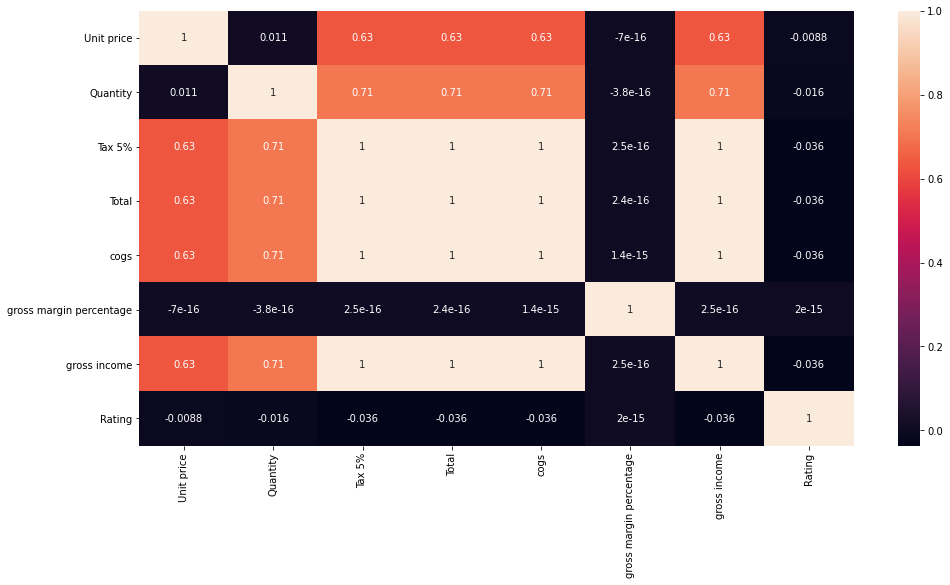

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
[i for i in data.columns if data[i].dtype == 'object']
data = pd.get_dummies(data,drop_first=True)

In [ ]:
data['TotalbyQuantity'] = data['Total'] / data['Quantity']

In [ ]:
num = data[['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = scaler.fit_transform(num)
num = pd.DataFrame(num,columns=['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'])
num

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131
...,...,...,...,...,...,...,...,...,...
995,0.336782,0.000000,0.030707,0.030707,0.030707,0.0,0.030707,0.366667,0.336782
996,0.971295,1.000000,0.980465,0.980465,0.980465,0.0,0.980465,0.066667,0.971295
997,0.242101,0.000000,0.022049,0.022049,0.022049,0.0,0.022049,0.616667,0.242101
998,0.620160,0.000000,0.056622,0.056622,0.056622,0.0,0.056622,0.016667,0.620160


In [ ]:
data=data.drop(['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'],axis=1)
data = pd.concat([data,num],axis=1)
data.head()

,DateTime,Invoice ID_101-81-4070,Invoice ID_102-06-2002,Invoice ID_102-77-2261,Invoice ID_105-10-6182,Invoice ID_105-31-1824,Invoice ID_106-35-6779,Invoice ID_109-28-2512,Invoice ID_109-86-4363,Invoice ID_110-05-6330,Invoice ID_110-48-7033,Invoice ID_114-35-5271,Invoice ID_115-38-7388,Invoice ID_115-99-4379,Invoice ID_118-62-1812,Invoice ID_120-06-4233,Invoice ID_120-54-2248,Invoice ID_122-61-9553,Invoice ID_123-19-1176,Invoice ID_123-35-4896,Invoice ID_124-31-1458,Invoice ID_125-45-2293,Invoice ID_126-54-1082,Invoice ID_127-47-6963,Invoice ID_129-29-8530,Invoice ID_130-67-4723,Invoice ID_130-98-8941,Invoice ID_131-15-8856,Invoice ID_131-70-8179,Invoice ID_132-23-6451,Invoice ID_132-32-9879,Invoice ID_133-14-7229,Invoice ID_133-77-3154,Invoice ID_134-54-4720,Invoice ID_134-75-2619,Invoice ID_135-13-8269,Invoice ID_135-84-8019,Invoice ID_136-08-6195,Invoice ID_137-63-5492,Invoice ID_137-74-8729,...,Invoice ID_882-40-4577,Invoice ID_883-17-4236,Invoice ID_883-69-1285,Invoice ID_884-80-6021,Invoice ID_885-17-6250,Invoice ID_885-56-0389,Invoice ID_886-18-2897,Invoice ID_886-54-6089,Invoice ID_886-77-9084,Invoice ID_887-42-0517,Invoice ID_888-02-0338,Invoice ID_889-04-9723,Invoice ID_891-01-7034,Invoice ID_891-58-8335,Invoice ID_892-05-6689,Invoice ID_894-41-5205,Invoice ID_895-03-6665,Invoice ID_895-66-0685,Invoice ID_896-34-0956,Invoice ID_898-04-2717,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,2019-01-05 13:08:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,2019-03-08 10:29:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,2019-03-03 13:23:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,2019-01-27 20:33:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,2019-02-08 10:37:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131


In [ ]:
data = data.drop(['DateTime'],axis=1)
#Splitting Datas
X = data.drop(['Total'],axis=1)
y = data['Total']

In [ ]:
X

,Invoice ID_101-81-4070,Invoice ID_102-06-2002,Invoice ID_102-77-2261,Invoice ID_105-10-6182,Invoice ID_105-31-1824,Invoice ID_106-35-6779,Invoice ID_109-28-2512,Invoice ID_109-86-4363,Invoice ID_110-05-6330,Invoice ID_110-48-7033,Invoice ID_114-35-5271,Invoice ID_115-38-7388,Invoice ID_115-99-4379,Invoice ID_118-62-1812,Invoice ID_120-06-4233,Invoice ID_120-54-2248,Invoice ID_122-61-9553,Invoice ID_123-19-1176,Invoice ID_123-35-4896,Invoice ID_124-31-1458,Invoice ID_125-45-2293,Invoice ID_126-54-1082,Invoice ID_127-47-6963,Invoice ID_129-29-8530,Invoice ID_130-67-4723,Invoice ID_130-98-8941,Invoice ID_131-15-8856,Invoice ID_131-70-8179,Invoice ID_132-23-6451,Invoice ID_132-32-9879,Invoice ID_133-14-7229,Invoice ID_133-77-3154,Invoice ID_134-54-4720,Invoice ID_134-75-2619,Invoice ID_135-13-8269,Invoice ID_135-84-8019,Invoice ID_136-08-6195,Invoice ID_137-63-5492,Invoice ID_137-74-8729,Invoice ID_138-17-5109,...,Invoice ID_881-41-7302,Invoice ID_882-40-4577,Invoice ID_883-17-4236,Invoice ID_883-69-1285,Invoice ID_884-80-6021,Invoice ID_885-17-6250,Invoice ID_885-56-0389,Invoice ID_886-18-2897,Invoice ID_886-54-6089,Invoice ID_886-77-9084,Invoice ID_887-42-0517,Invoice ID_888-02-0338,Invoice ID_889-04-9723,Invoice ID_891-01-7034,Invoice ID_891-58-8335,Invoice ID_892-05-6689,Invoice ID_894-41-5205,Invoice ID_895-03-6665,Invoice ID_895-66-0685,Invoice ID_896-34-0956,Invoice ID_898-04-2717,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.718847,0.666667,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.057855,0.444444,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0.403316,0.666667,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.535603,0.777778,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0.848131,0.666667,0.604377,0.604377,0.0,0.604377,0.216667,0.848131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0.336782,0.000000,0.030707,0.030707,0.0,0.030707,0.366667,0.336782
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0.971295,1.000000,0.980465,0.980465,0.0,0.980465,0.066667,0.971295
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.242101,0.000000,0.022049,0.022049,0.0,0.022049,0.616667,0.242101
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0.620160,0.000000,0.056622,0.056

In [ ]:
y

0      0.521616
1      0.067387
2      0.319628
3      0.463549
4      0.604377
         ...   
995    0.030707
996    0.980465
997    0.022049
998    0.056622
999    0.618835
Name: Total, Length: 1000, dtype: float64

# **SPLITTING THE DATA INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.45,random_state=42)

In [ ]:
X_train.shape

(550, 1018)

# **MODELLING**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Fit Models
from sklearn.linear_model import LinearRegression
#Scoring function
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# **LINEAR REGRESSION**

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(model1.score(X_train,y_train))
linear_r2 = (model1.score(X_test,y_test))
linear_r2

0.004929289591742629
0.006589557841012507
1.0


0.9992597363445245

In [ ]:
mae_lr = round(mean_absolute_error(y_test, y_pred),4)
mae_lr

0.0049

In [ ]:
rmse_lr = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
rmse_lr

0.01

# **XGBOOST REGRESSOR**

In [ ]:
from xgboost import XGBRegressor 

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train , y_train)

xgb_r2 = xgb_model.score(X_test, y_test)

print("XGBoost R^2 Score: {:.5f}".format(xgb_r2))
y_pred_xgbr = xgb_model.predict(X_test)
y_pred_xgbr

[10:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost R^2 Score: 0.99990


array([0.49360391, 0.57946205, 0.38177222, 0.1235486 , 0.03334218,
       0.5973871 , 0.11355922, 0.70048   , 0.42652166, 0.12375093,
       0.3965536 , 0.43746406, 0.19743589, 0.23392737, 0.27041182,
       0.3057487 , 0.5578008 , 0.1994445 , 0.7201261 , 0.168075  ,
       0.3924211 , 0.1504063 , 0.1138356 , 0.11173239, 0.22925675,
       0.17931718, 0.7078729 , 0.02023146, 0.13065776, 0.04426837,
       0.06296247, 0.57952136, 0.08423248, 0.40557846, 0.17835605,
       0.15878063, 0.63714695, 0.17967996, 0.17829102, 0.17838117,
       0.19810143, 0.88057995, 0.06280088, 0.16465762, 0.07910243,
       0.38014522, 0.20712596, 0.05838203, 0.32678306, 0.25955778,
       0.40551275, 0.08858445, 0.05841354, 0.2527069 , 0.16463548,
       0.4701414 , 0.43662018, 0.04937997, 0.4331451 , 0.20720607,
       0.11227101, 0.02394053, 0.07199958, 0.9046638 , 0.3625019 ,
       0.4833659 , 0.34677052, 0.72756314, 0.89771235, 0.10338694,
       0.3657737 , 0.11378178, 0.27423304, 0.07314134, 0.05372

In [ ]:
mae_xgbr = round(mean_absolute_error(y_test, y_pred_xgbr),4)
mae_xgbr

0.0016

In [ ]:
rmse_xgbr = round(np.sqrt(mean_squared_error(y_test, y_pred_xgbr)),4)
rmse_xgbr

0.0024

# **SUPPORT VECTOR MACHINE (REGRESSOR)**

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#svc_model = svm.SVC(kernel='poly')
#svc_model = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
from sklearn.svm import SVR
svr_model = make_pipeline(StandardScaler(), SVR(gamma='scale'))
#svc_model.fit(X, y)
svr_model.fit(X_train, y_train)
svr_model.score(X_train, y_train)

y_pred_svm = svr_model.predict(X_test)
y_pred_svm
svr_r2 = svr_model.score(X_test, y_test)

In [ ]:
svr_r2

0.9679691765367794

In [ ]:
mae_svr = round(mean_absolute_error(y_test, y_pred_svm),2)
mae_svr

0.04

In [ ]:
rmse_svr = round(np.sqrt(mean_squared_error(y_test, y_pred_svm)),4)
rmse_svr

0.0433

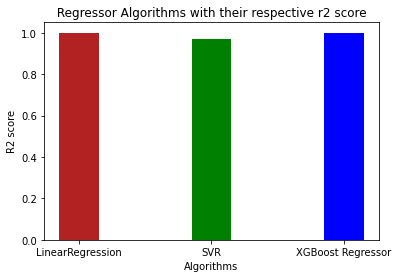

In [ ]:
algos_reg = ['LinearRegression', 'SVR', 'XGBoost Regressor']
r2 = [linear_r2,svr_r2,xgb_r2]
plt.bar(algos_reg,r2 , color=['firebrick', 'green', 'blue'],width= 0.3)
plt.xlabel('Algorithms')
plt.ylabel("R2 score")
plt.title(' Regressor Algorithms with their respective r2 score ')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
results = pd.DataFrame({
 'Model': [ 
  'Support Vector Machine(regressor)', 
 'XGBoost Regressor','linear regression'
 ],
 'Score': [mae_svr, 
 mae_xgbr, mae_lr]})
result_df = results.sort_values(by='Score', ascending=True)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.0016,XGBoost Regressor
0.0049,linear regression
0.0400,Support Vector Machine(regressor)


In [ ]:
results = pd.DataFrame({
 'Model': [ 
  'Support Vector Machine(regressor)', 
 'XGBoost Regressor','linear regression'
 ],
 'Score': [rmse_svr, 
 rmse_xgbr, rmse_lr]})
result_df = results.sort_values(by='Score', ascending=True)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.0024,XGBoost Regressor
0.0100,linear regression
0.0433,Support Vector Machine(regressor)
